# Loading and Preparing Data

We cover loading data and then Pandas data cleaning and organisation commands

In [1]:
# We load Pandas and prefix all of its commands with pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Pandas has a special data type called a DataFrame that is similar to the one used in R

It provides a lot of very powerful functionality

## The Titanic Dataset

In [2]:
# We read the file into the data frame in one go
# Pandas always assumes that the first row is the header
df = pd.read_csv("data/titanic/train.csv") 

In [3]:
# What is this ?
type(df)

pandas.core.frame.DataFrame

In [4]:
# We can see the size of the data frame
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# head gives us the first 5 rows 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Tail gives the last 5 rows 
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
891-714

177

In [10]:
891-204

687

In [11]:
df.Survived.unique()

array([0, 1], dtype=int64)

## Examining the Dataframe

In [12]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [14]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# We can use Masks to filter data to find the babies on the Titanic
babies = df['Age'] < 1

In [19]:
# This only returns values when the element is True
df[babies]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Visualising the Data

<AxesSubplot:>

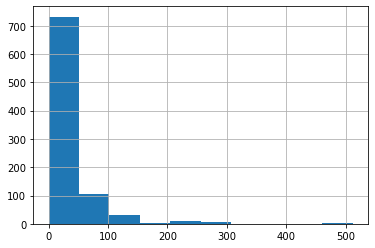

In [20]:
df.Fare.hist()

<AxesSubplot:>

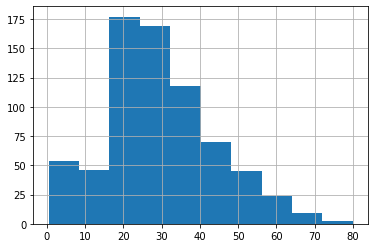

In [21]:
df.Age.hist()

<AxesSubplot:>

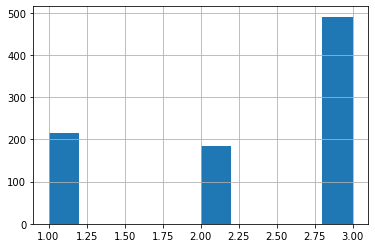

In [22]:
df['Pclass'].hist()

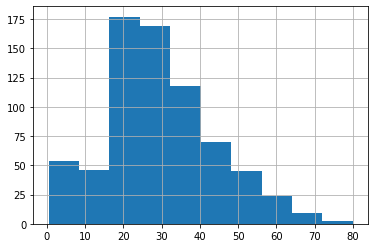

In [23]:
df['Age'].hist();

<AxesSubplot:>

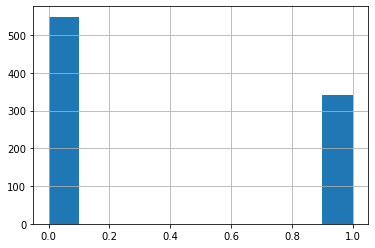

In [24]:
df.Survived.hist()

## Cleaning and Preparing the Data

In [25]:
# Looks like lots of nulls for Cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
# We drop this column from the data
df = df.drop(['Cabin'], axis = 1) 

In [27]:
df.drop(['Name'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


A number of entries do not have a valid age - how should we fix this - drop rows ? But then we lose their other data

In [29]:
averageAge = df['Age'].mean()
print(averageAge)

29.69911764705882


In [30]:
dfSurvived = df[df.Survived == 1]
dfSurvived['Age'].mean()

28.343689655172415

In [31]:
dfNotSurvived = df[df.Survived == 0]
dfNotSurvived['Age'].mean()

30.62617924528302

In [32]:
df['Age'] = df['Age'].fillna(averageAge)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [34]:
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


## Scikit Learn

In [44]:
import sklearn

In [45]:
from sklearn.preprocessing import MinMaxScaler
df['AgeMM'] = MinMaxScaler().fit_transform(df.Age.values.reshape(-1,1))

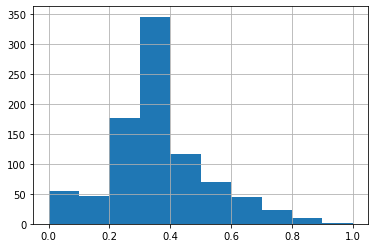

In [47]:
df.AgeMM.hist();

In [48]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))

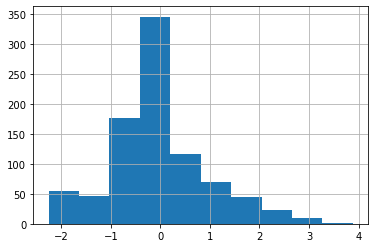

In [50]:
df.AgeSD.hist();

In [51]:
emb_mapping = {'S':1, 'C':2, 'Q':3}
df['EmbMap'] = df.Embarked.map(emb_mapping)

In [52]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeMM,AgeSD,EmbMap
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,-0.590495,1
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.643971,2
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,-0.281878,1
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,0.434531,0.412509,1
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0.434531,0.412509,1
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q,0.367921,0.003524,3


In [53]:
from sklearn.preprocessing import LabelEncoder
X = df[['Embarked']].values
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
df['EmbCat'] = X[:,0]

In [54]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeMM,AgeSD,EmbMap,EmbCat
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,-0.590495,1,2
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.643971,2,0
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,-0.281878,1,2
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,0.434531,0.412509,1,2
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0.434531,0.412509,1,2
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q,0.367921,0.003524,3,1


In [55]:
one_hot = pd.get_dummies(df['Embarked'])
df = df.join(one_hot)


In [56]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeMM,AgeSD,EmbMap,EmbCat,C,Q,S
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0.271174,-0.590495,1,2,0,0,1
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,0.472229,0.643971,2,0,1,0,0
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0.321438,-0.281878,1,2,0,0,1
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,0.434531,0.412509,1,2,0,0,1
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0.434531,0.412509,1,2,0,0,1
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q,0.367921,0.003524,3,1,0,1,0


## More Analysis


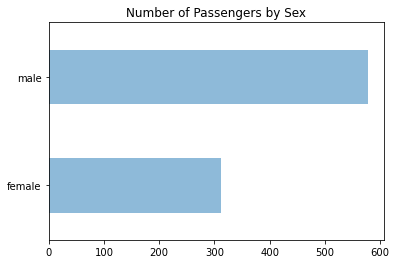

In [57]:
# Did survivability depend on sex ? Look at absolute numbers first.
df.Sex.value_counts().sort_index().plot(kind='barh', alpha=0.5)
plt.title("Number of Passengers by Sex");  

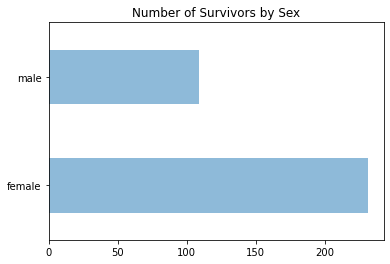

In [58]:
# Did survivability depend on sex ? Look at absolute numbers first.
df_survived = df[df.Survived==1]
df_survived.Sex.value_counts().sort_index().plot(kind='barh', alpha=0.5)
plt.title("Number of Survivors by Sex");  

<AxesSubplot:title={'center':'Percentage of Survived by Sex'}>

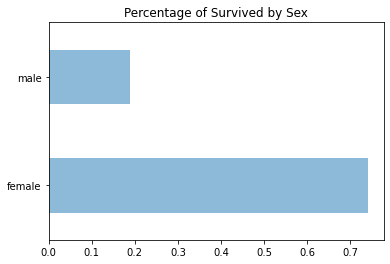

In [59]:
plt.title("Percentage of Survived by Sex")
numer = df_survived.Sex.value_counts().sort_index()
denom = df.Sex.value_counts().sort_index()
(numer/denom).plot(kind='barh', alpha=0.5)

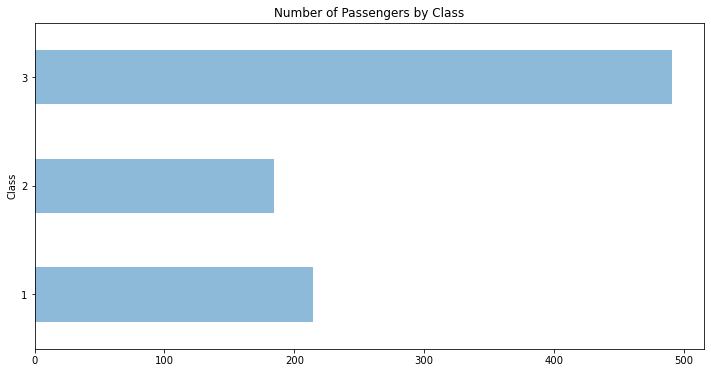

In [66]:
plt.figure(figsize=(12, 6))
plt.title("Number of Passengers by Class")
df.Pclass.value_counts().sort_index().plot(kind='barh', alpha=0.5)
denom = df.Pclass.value_counts().sort_index()
plt.ylabel("Class");

Text(0, 0.5, 'Class')

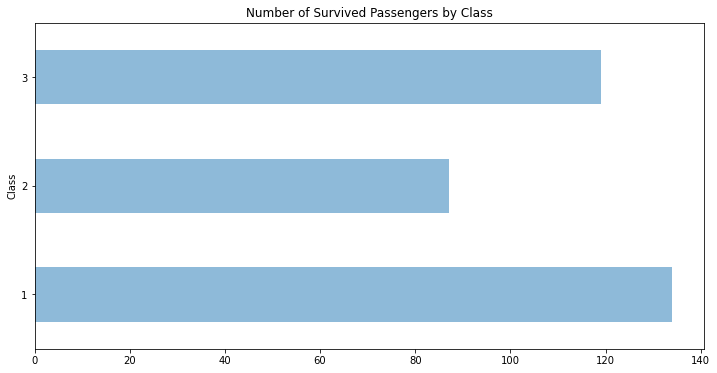

In [65]:
# plots a histogram estimate of the subset passengers's age by class
plt.figure(figsize=(12, 6))
plt.title("Number of Survived Passengers by Class")
df_survived.Pclass.value_counts().sort_index().plot(kind='barh', alpha=0.5)
numer = df_survived.Pclass.value_counts().sort_index()
plt.ylabel("Class")

Text(0, 0.5, 'Class')

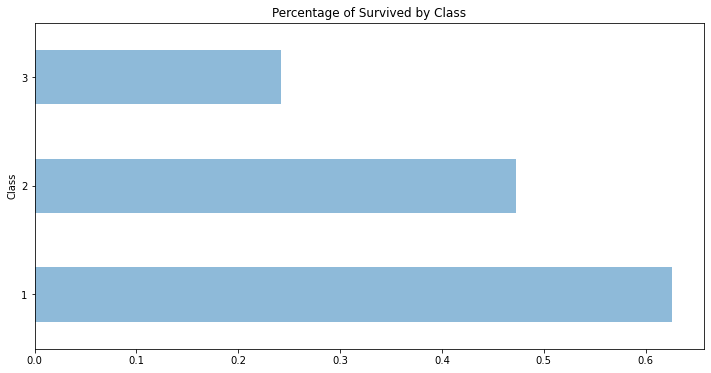

In [64]:
# plots a histogram estimate of the subset passengers's age by class
plt.figure(figsize=(12, 6))
plt.title("Percentage of Survived by Class")
(numer/denom).plot(kind='barh', alpha=0.5)
plt.ylabel("Class")